In [2]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load Dataset
file_path = "Data-Melbourne_F_fixed.csv"  
data = pd.read_csv(file_path)



In [3]:
print("\nChecking for Missing Values:")
print(data.isnull().sum())




Checking for Missing Values:
Unnamed: 0                  0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64


In [4]:
correlation = data[data.columns].corr()
correlation

,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
Unnamed: 0,1.000000,0.308471,0.378175,0.232384,0.121004,-0.241955,0.228638,0.095041,-0.034638,-0.045970,0.047995,0.027521,-0.075676,-0.207726,-0.039775,-0.022567,0.000486,0.983282,0.052026,0.017682
Average Outflow,0.308471,1.000000,0.541923,0.167099,0.040590,-0.115811,-0.022723,-0.061951,-0.000163,0.006070,0.035516,-0.068941,-0.016560,-0.090001,-0.027635,-0.015406,-0.006319,0.308915,-0.012221,-0.061292
Average Inflow,0.378175,0.541923,1.000000,0.136211,-0.032709,-0.121364,0.018026,-0.035827,0.098149,0.093073,0.140905,-0.012452,-0.040534,-0.100358,-0.031872,-0.025010,-0.012203,0.388505,-0.066273,-0.055009
Energy Consumption,0.232384,0.167099,0.136211,1.000000,-0.133076,-0.136945,0.000346,-0.167448,-0.266053,-0.245119,-0.222896,-0.004160,0.155245,-0.014242,0.007085,0.020656,0.017388,0.179876,0.272076,0.023010
Ammonia,0.121004,0.040590,-0.032709,-0.133076,1.000000,0.164753,0.284552,0.342995,0.110000,0.099279,0.094802,-0.032908,-0.076970,-0.074313,-0.028647,-0.047966,-0.048622,0.140567,-0.112396,-0.029223
Biological Oxygen Demand,-0.241955,-0.115811,-0.121364,-0.136945,0.164753,1.000000,0.524189,0.455843,0.150706,0.137368,0.133025,-0.011270,-0.087240,0.001186,-0.019039,0.001384,0.000370,-0.228753,-0.065866,-0.000713
Chemical Oxygen Demand,0.228638,-0.022723,0.018026,0.000346,0.284552,0.524189,1.000000,0.681225,0.083946,0.090018,0.052716,0.002585,-0.152655,-0.055335,-0.050351,-0.029496,-0.006580,0.231927,-0.034368,0.005837
Total Nitrogen,0.095041,-0.061951,-0.035827,-0.167448,0.342995,0.455843,0.681225,1.000000,0.269751,0.259386,0.232274,0.006595,-0.210108,-0.012618,-0.053080,-0.029228,0.006540,0.120105,-0.142140,-0.007392
Average Temperature,-0.034638,-0.000163,0.098149,-0.266053,0.110000,0.150706,0.083946,0.269751,1.000000,0.924944,0.890901,0.013499,-0.553688,-0.004256,-0.122247,0.098620,0.219791,0.015400,-0.272413,-0.009542
Maximum temperature,-0.045970,0.006070,0.093073,-0.245119,0.099279,0.137368,0.090018,0.259386,0.924944,1.000000,0.759461,0.018942,-0.533249,-0.003110,-0.120905,0.035349,0.199370,-0.004957,-0.223353,0.006459


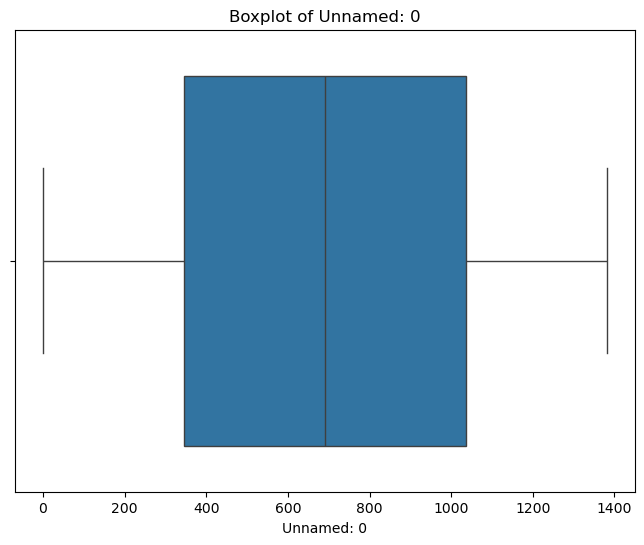

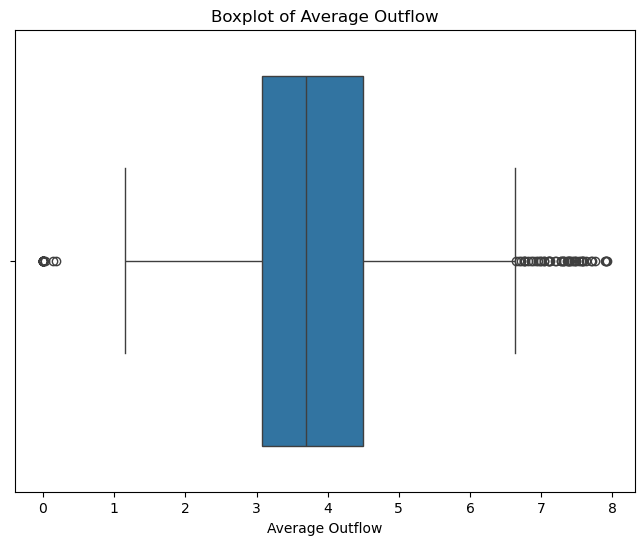

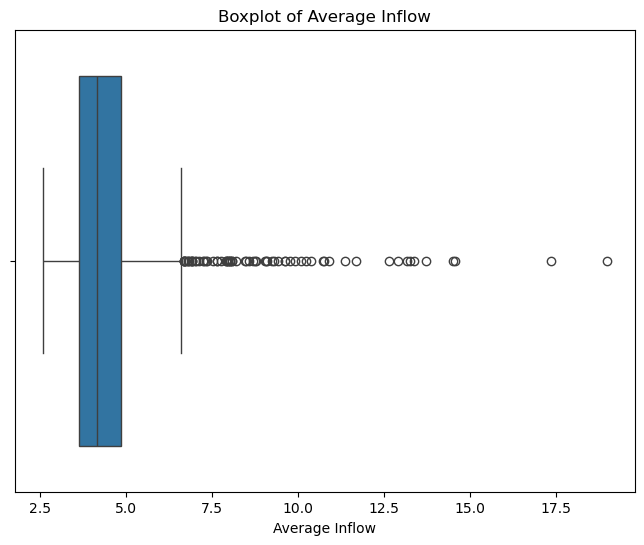

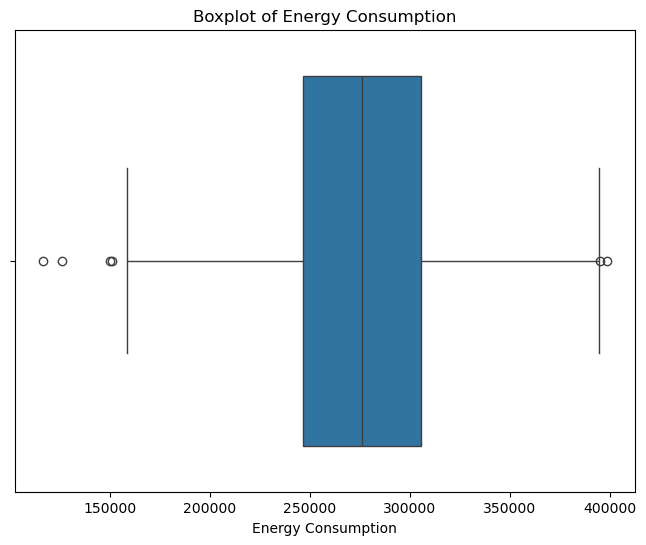

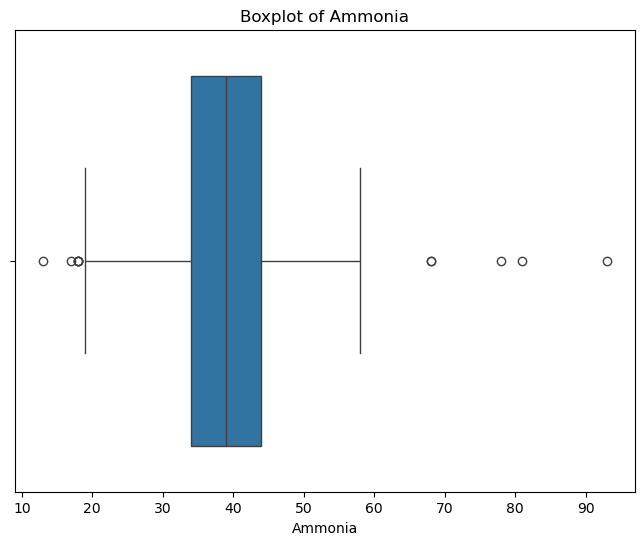

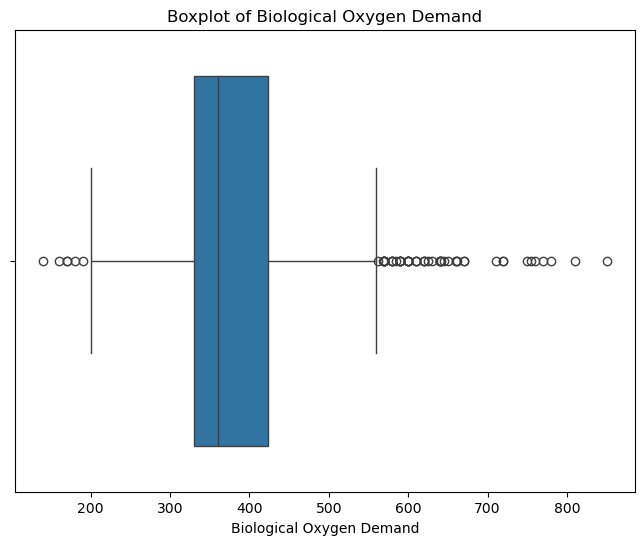

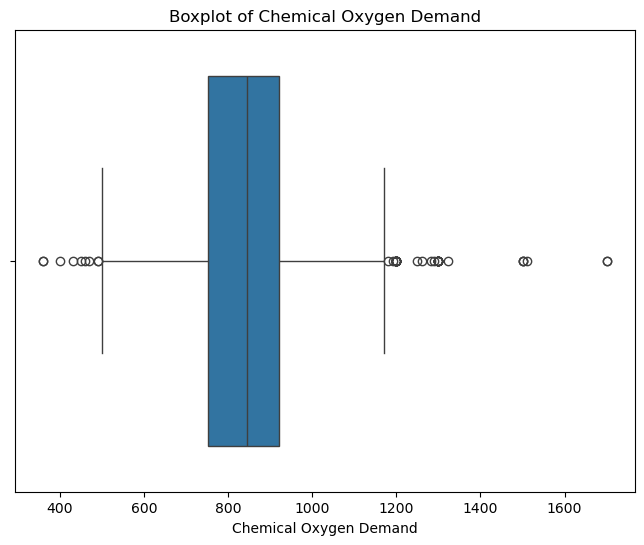

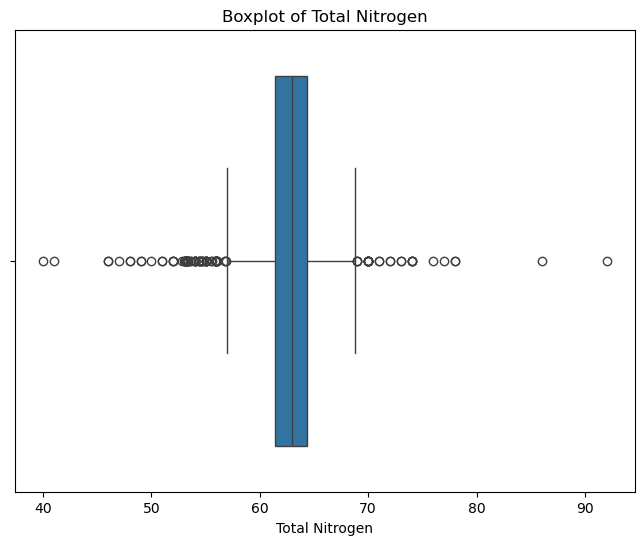

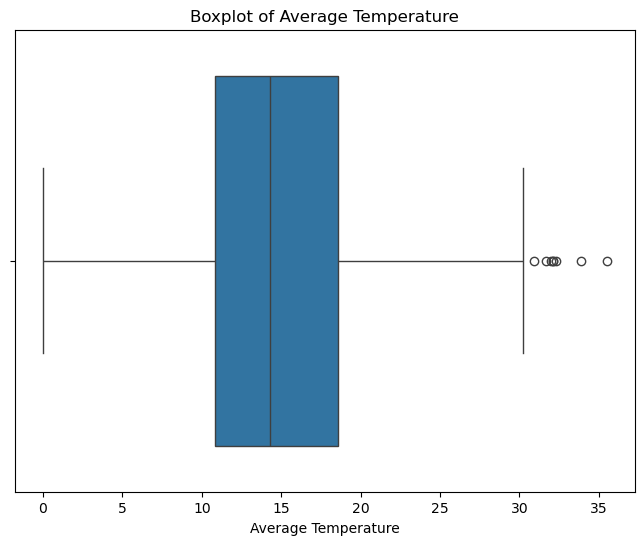

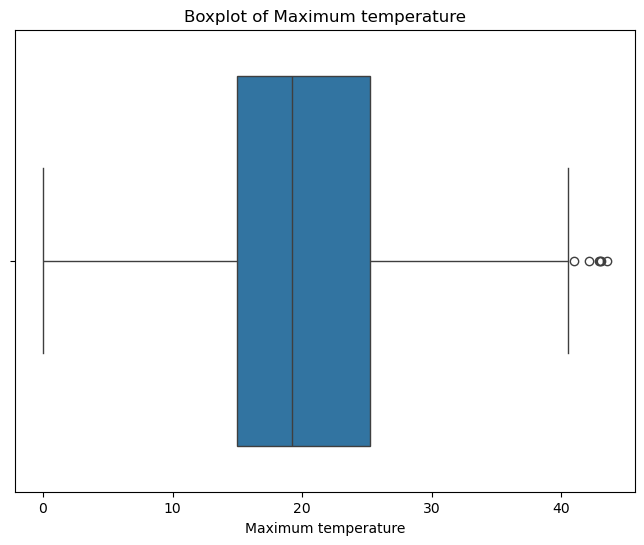

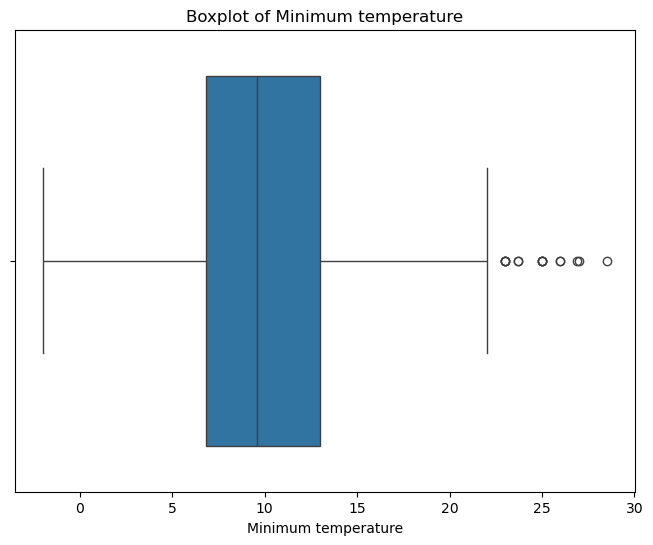

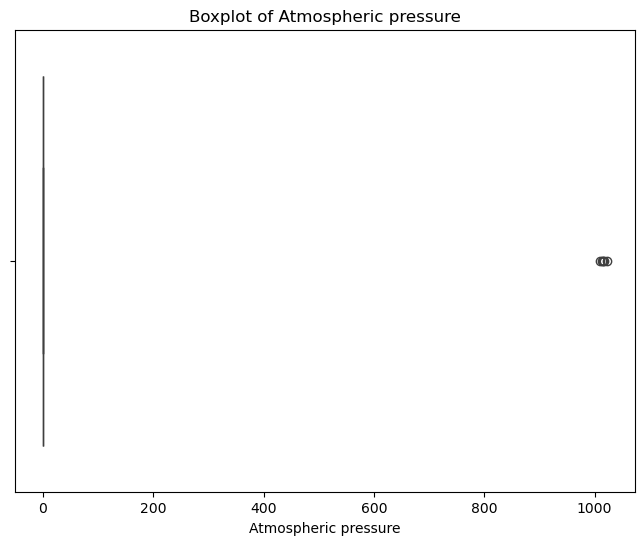

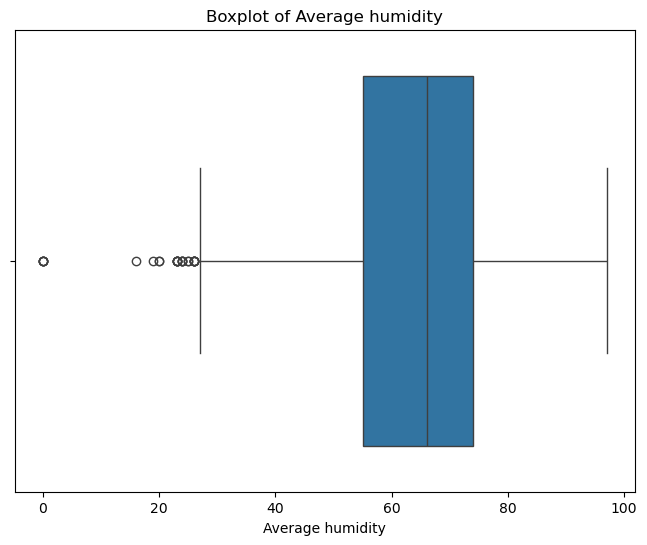

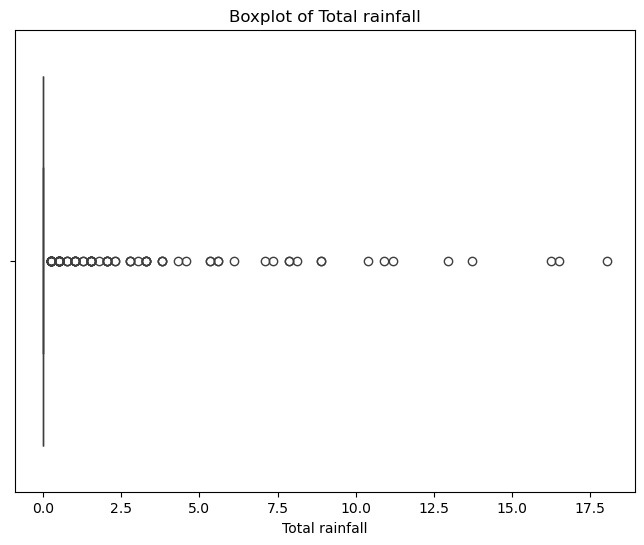

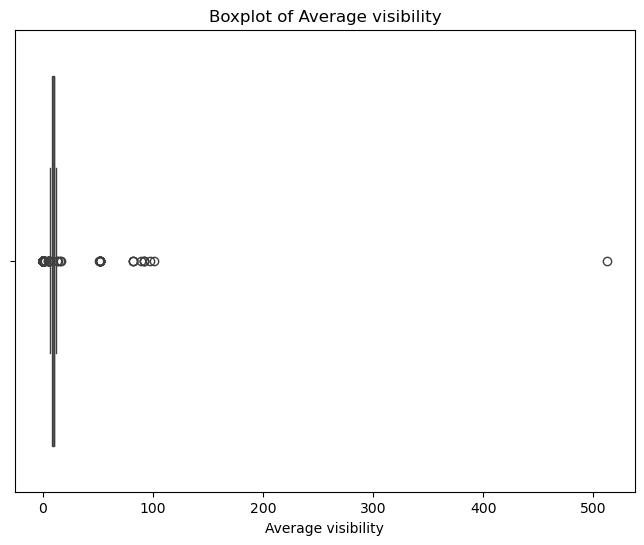

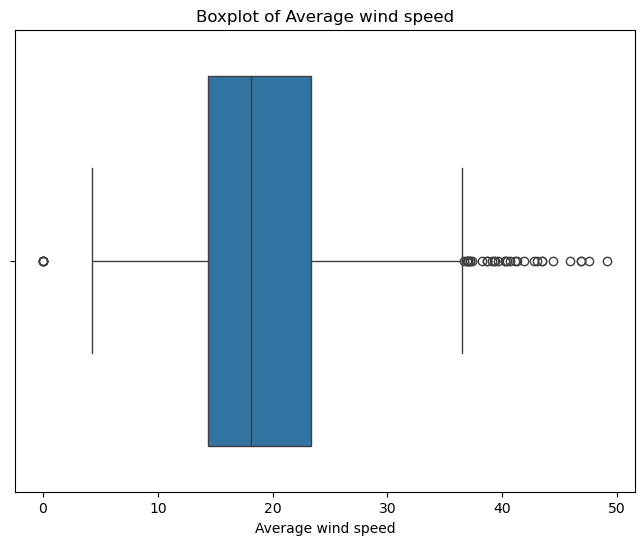

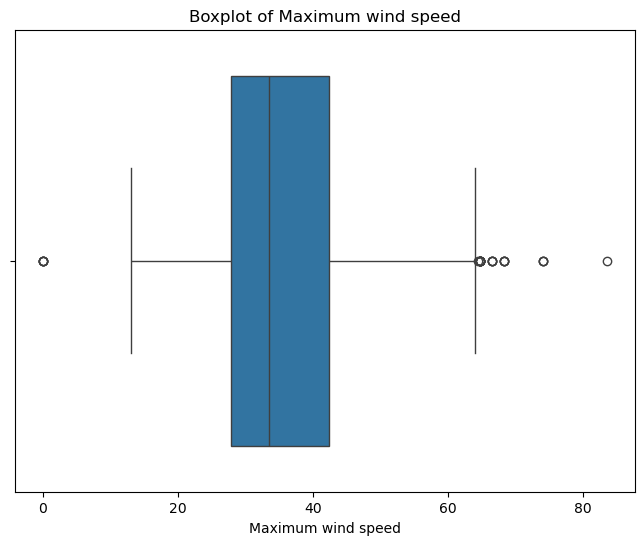

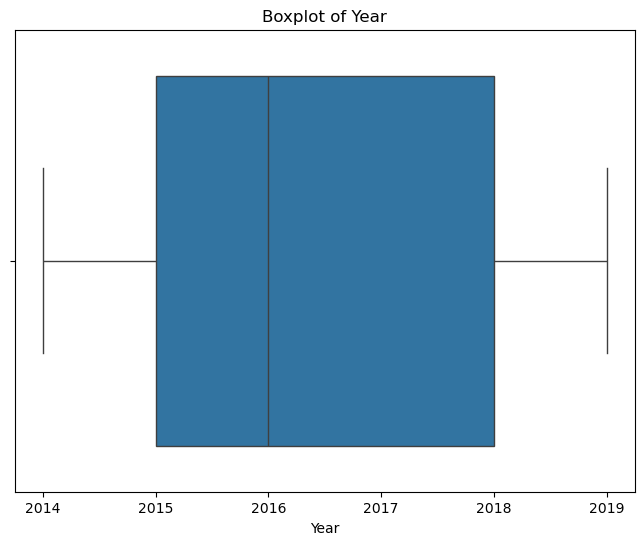

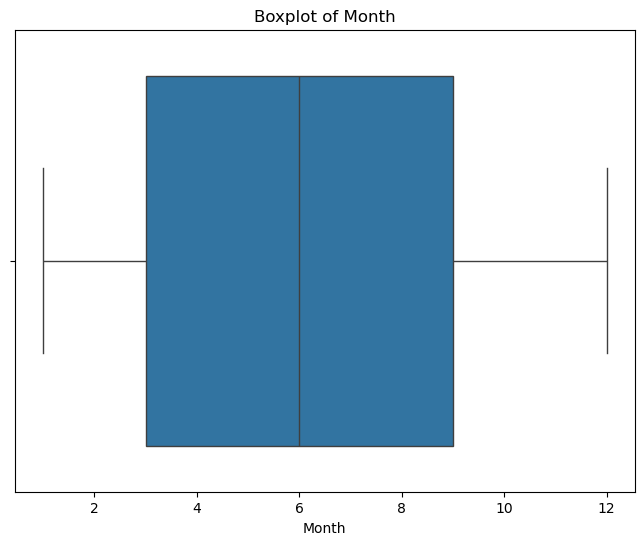

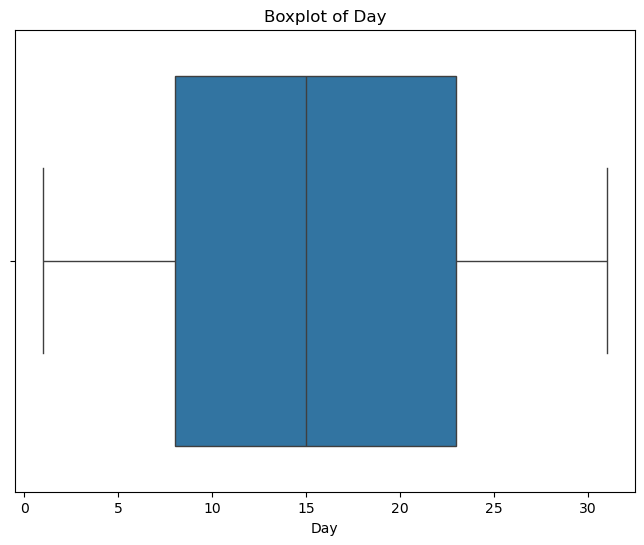

In [5]:
columns = data.columns


for column in columns:
    if data[column].dtype in ['float64', 'int64']:  
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column])
        plt.title(f"Boxplot of {column}")
        plt.xlabel(column)
        plt.show()

In [6]:

data.fillna(data.mean(), inplace=True) 

X = data.drop(columns=['Chemical Oxygen Demand']).values 
y = data['Chemical Oxygen Demand'].values  
y = (y <= 800).astype(int)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



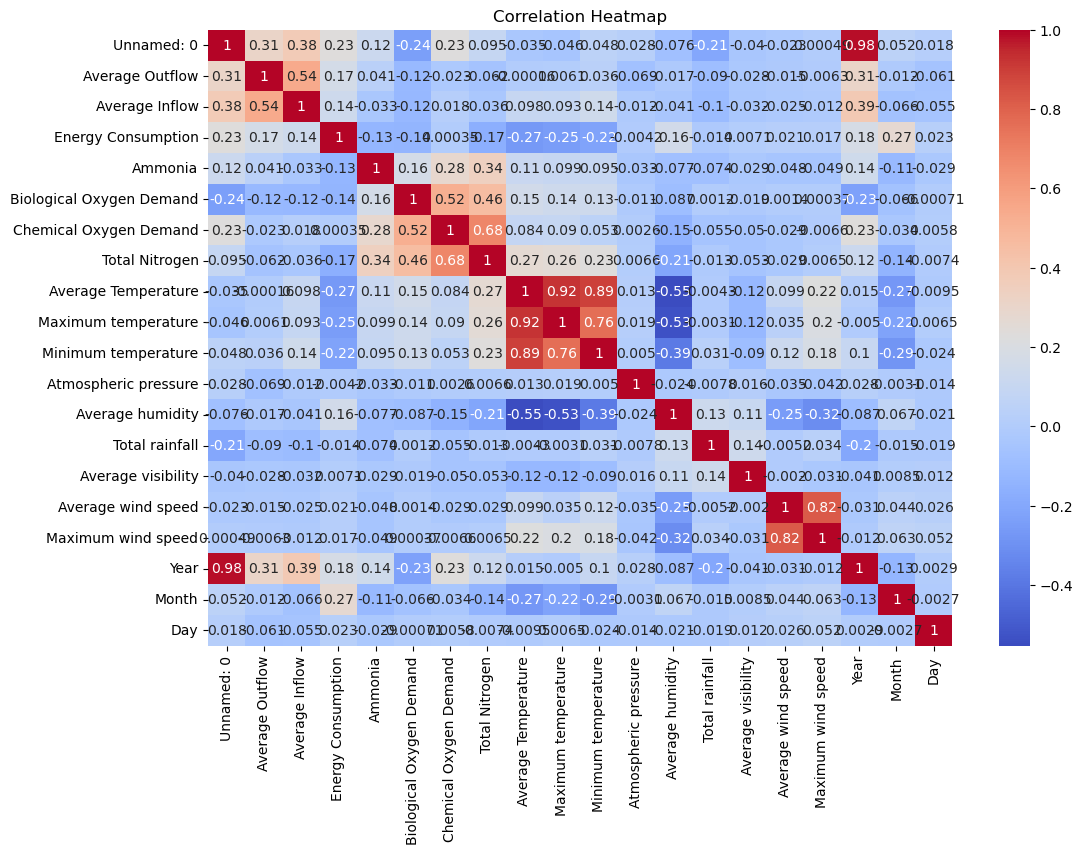

In [7]:

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [38]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]



In [8]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]



In [9]:

log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg_scratch.fit(X_train, y_train)
y_pred_lr_scratch = log_reg_scratch.predict(X_test)
print("\nLogistic Regression (Scratch) Accuracy:", accuracy_score(y_test, y_pred_lr_scratch))




Logistic Regression (Scratch) Accuracy: 0.855595667870036


In [11]:
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg_scratch.fit(X_train, y_train)
y_pred_lr_scratch = log_reg_scratch.predict(X_test)
print("\nLogistic Regression (Scratch) Accuracy:", accuracy_score(y_test, y_pred_lr_scratch))




Logistic Regression (Scratch) Accuracy: 0.855595667870036


In [12]:
# Logistic Regression using sklearn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("\nLogistic Regression (Sklearn) Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression (Sklearn) Accuracy: 0.8772563176895307


In [13]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))



KNN Accuracy: 0.8267148014440433


In [14]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.924187725631769


In [15]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Accuracy: 0.9422382671480144


In [16]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8916967509025271


In [17]:
# Model Evaluation
models = {
    "Logistic Regression (Scratch)": y_pred_lr_scratch,
    "Logistic Regression (Sklearn)": y_pred_lr,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

for name, predictions in models.items():
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("F1 Score:", f1_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))



Logistic Regression (Scratch):
Accuracy: 0.855595667870036
F1 Score: 0.7872340425531915
Confusion Matrix:
 [[163  23]
 [ 17  74]]

Logistic Regression (Sklearn):
Accuracy: 0.8772563176895307
F1 Score: 0.8210526315789474
Confusion Matrix:
 [[165  21]
 [ 13  78]]

KNN:
Accuracy: 0.8267148014440433
F1 Score: 0.75
Confusion Matrix:
 [[157  29]
 [ 19  72]]

Decision Tree:
Accuracy: 0.924187725631769
F1 Score: 0.8864864864864865
Confusion Matrix:
 [[174  12]
 [  9  82]]

Random Forest:
Accuracy: 0.9422382671480144
F1 Score: 0.9130434782608695
Confusion Matrix:
 [[177   9]
 [  7  84]]

SVM:
Accuracy: 0.8916967509025271
F1 Score: 0.8469387755102041
Confusion Matrix:
 [[164  22]
 [  8  83]]


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy after Tuning: 0.9386281588447654
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy after Tuning: 0.8953068592057761
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] E

/var/folders/1c/c59w3tms3cn9vh_0vcwrk7vc0000gn/T/ipykernel_91968/2788684314.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


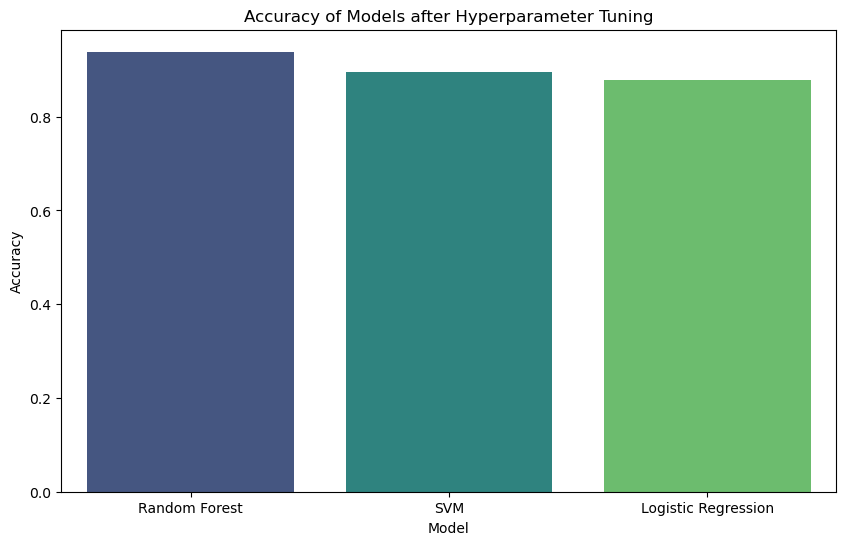

/var/folders/1c/c59w3tms3cn9vh_0vcwrk7vc0000gn/T/ipykernel_91968/2788684314.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=f1_scores, palette='viridis')


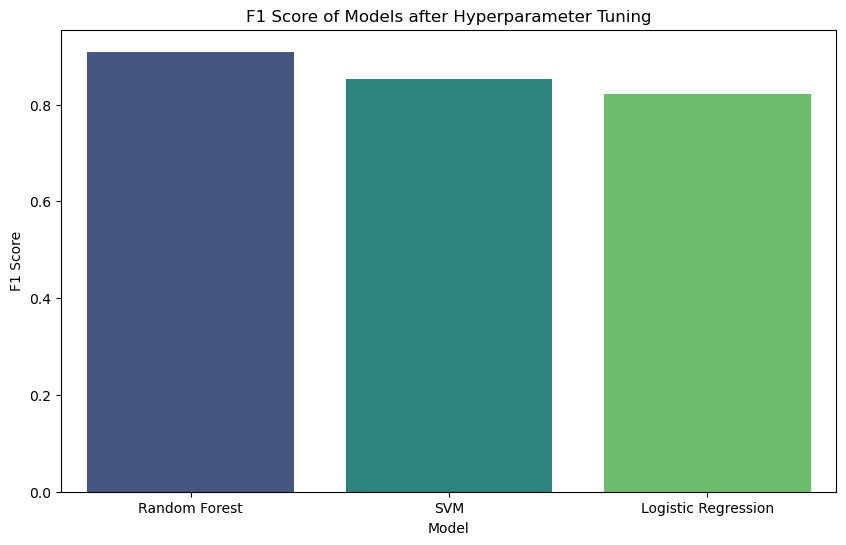

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(f"Best Random Forest Hyperparameters: {grid_search_rf.best_params_}")
y_pred_rf_best = grid_search_rf.predict(X_test)
print(f"Random Forest Accuracy after Tuning: {accuracy_score(y_test, y_pred_rf_best)}")

# Perform GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)
print(f"Best SVM Hyperparameters: {grid_search_svm.best_params_}")
y_pred_svm_best = grid_search_svm.predict(X_test)
print(f"SVM Accuracy after Tuning: {accuracy_score(y_test, y_pred_svm_best)}")

# Perform GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)
print(f"Best Logistic Regression Hyperparameters: {grid_search_lr.best_params_}")
y_pred_lr_best = grid_search_lr.predict(X_test)
print(f"Logistic Regression Accuracy after Tuning: {accuracy_score(y_test, y_pred_lr_best)}")

# Collecting the results for plotting
models = {
    "Random Forest": {
        "accuracy": accuracy_score(y_test, y_pred_rf_best),
        "f1_score": f1_score(y_test, y_pred_rf_best)
    },
    "SVM": {
        "accuracy": accuracy_score(y_test, y_pred_svm_best),
        "f1_score": f1_score(y_test, y_pred_svm_best)
    },
    "Logistic Regression": {
        "accuracy": accuracy_score(y_test, y_pred_lr_best),
        "f1_score": f1_score(y_test, y_pred_lr_best)
    }
}

# 1. Plotting Accuracy of Models
plt.figure(figsize=(10, 6))
model_names = list(models.keys())
accuracies = [models[model]["accuracy"] for model in model_names]
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Accuracy of Models after Hyperparameter Tuning")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

# 2. Plotting F1 Score of Models
plt.figure(figsize=(10, 6))
f1_scores = [models[model]["f1_score"] for model in model_names]
sns.barplot(x=model_names, y=f1_scores, palette='viridis')
plt.title("F1 Score of Models after Hyperparameter Tuning")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.show()
